#Data Cleaning and Preparing


In [ ]:
import json
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-199-83872d5e0085>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
with open('result.json') as f:
  data = json.load(f)

In [ ]:
data

{'name': 'INOMARKA MOSHINA BOZORIM',
 'type': 'public_channel',
 'id': 2055080856,
 'messages': [{'id': 1,
   'type': 'service',
   'date': '2024-01-19T16:27:59',
   'date_unixtime': '1705663679',
   'actor': 'INOMARKA MOSHINA BOZORIM',
   'actor_id': 'channel2055080856',
   'action': 'create_channel',
   'title': 'INOMARKA MOSHINA BOZORIM',
   'text': '',
   'text_entities': []},
  {'id': 3,
   'type': 'message',
   'date': '2024-01-26T16:31:06',
   'date_unixtime': '1706268666',
   'edited': '2024-02-04T04:16:03',
   'edited_unixtime': '1707002163',
   'from': 'INOMARKA MOSHINA BOZORIM',
   'from_id': 'channel2055080856',
   'photo': '(File not included. Change data exporting settings to download.)',
   'width': 1250,
   'height': 1000,
   'text': ['🚘Moshina modeli: ',
    {'type': 'hashtag', 'text': '#Hyundai'},
    ' Tucson\n🔢Pozitsiya: Full\n🔄Kraska: Toza\n♻️Rangi: Shompanskiy\n📶Yil: 2009\n🆙Probeg: 125.000 km \n⛽️Benzin\n💲Narxi: 13,700$\n📞Tel: ',
    {'type': 'phone', 'text': '+99

In [ ]:
data = data['messages']

In [ ]:
#Json filedagi ma'lumotni listlarga ko'chirish

models = []
colors = []
years = []
mileages = []
prices = []

for message in data:
    if message['type'] == 'message' and 'text' in message:
        text = ''.join([entity['text'] for entity in message['text_entities']])

        if 'Moshina modeli:' in text and 'Yil:' in text and 'Probeg:' in text and 'Narxi:' in text:
            model_match = re.search(r'#(\w+)', text)
            model = model_match.group(1).lower() if model_match else ""

            color = text.split('Rangi:')[-1].split('\n')[0].strip().lower()

            year_match = re.search(r'Yil:\s*(\d+)', text)
            year = year_match.group(1) if year_match else ""

            mileage_match = re.search(r'Probeg:\s*([\d,.]+)', text)
            mileage = re.sub(r'[^\d]', '', mileage_match.group(1)) if mileage_match else ""

            price_match = re.search(r'Narxi:\s*([\d,.]+)', text)
            price = re.sub(r'[^\d]', '', price_match.group(1)) if price_match else ""

            models.append(model)
            colors.append(color)
            years.append(year)
            mileages.append(mileage)
            prices.append(price)

In [ ]:
df = pd.DataFrame({
    'Moshina modeli': models,
    'Rangi': colors,
    'Yil': years,
    'Probeg': mileages,
    'Narxi': prices
})

In [ ]:
#Faqat asosiy ranglarni qoldirish

color_counts = Counter()
for color in df['Rangi']:
    normalized_color = color.lower().strip()
    if normalized_color:
        color_counts[normalized_color] += 1

top_8_colors = [color for color, _ in color_counts.most_common(8)]

df['Rangi'] = df['Rangi'].apply(lambda x: x.lower().strip() if x.lower().strip() in top_8_colors else 'boshqa')

print("Yangilangan DataFrame:")
df

Yangilangan DataFrame:


,Moshina modeli,Rangi,Yil,Probeg,Narxi
0,hyundai,boshqa,2009,125000,13700
1,hyundai,kulrang,2022,25000,29500
2,kia,oq,2022,9900,24000
3,byd,qora,2023,10000,24700
4,chevrolet,oq,2023,0,23400
...,...,...,...,...,...
268,byd,qora,2024,0,25800
269,toyota,oq jemchuk,2012,161000,30000
270,byd,boshqa,2023,6300,44000
271,volkswagen,qora,2020,58000,19000


In [ ]:
#Barcha narxlarni dollar ($) ko'rinishida saqlash

def som_to_usd(value, exchange_rate=12000):
    if pd.isna(value) or value == '':
        return None

    value = str(value).replace(',', '').lower()

    num_match = re.search(r'\d+', value)
    if not num_match:
        return None

    num_value = float(num_match.group())

    if 'сум' in value or 'so\'m' in value or 'сўм' in value:
        if num_value > 10000000:
            return round(num_value / exchange_rate, 2)
        else:
            return num_value
    elif '$' in value or 'usd' in value:
        return num_value
    else:
        if num_value > 10000000:
            return round(num_value / exchange_rate, 2)
        else:
            return num_value

    return None
df['Narxi'] = df['Narxi'].apply(som_to_usd)

In [ ]:
df

,Moshina modeli,Rangi,Yil,Probeg,Narxi
0,hyundai,boshqa,2009,125000,13700.0
1,hyundai,kulrang,2022,25000,29500.0
2,kia,oq,2022,9900,24000.0
3,byd,qora,2023,10000,24700.0
4,chevrolet,oq,2023,0,23400.0
...,...,...,...,...,...
268,byd,qora,2024,0,25800.0
269,toyota,oq jemchuk,2012,161000,30000.0
270,byd,boshqa,2023,6300,44000.0
271,volkswagen,qora,2020,58000,19000.0


#Visualisation part

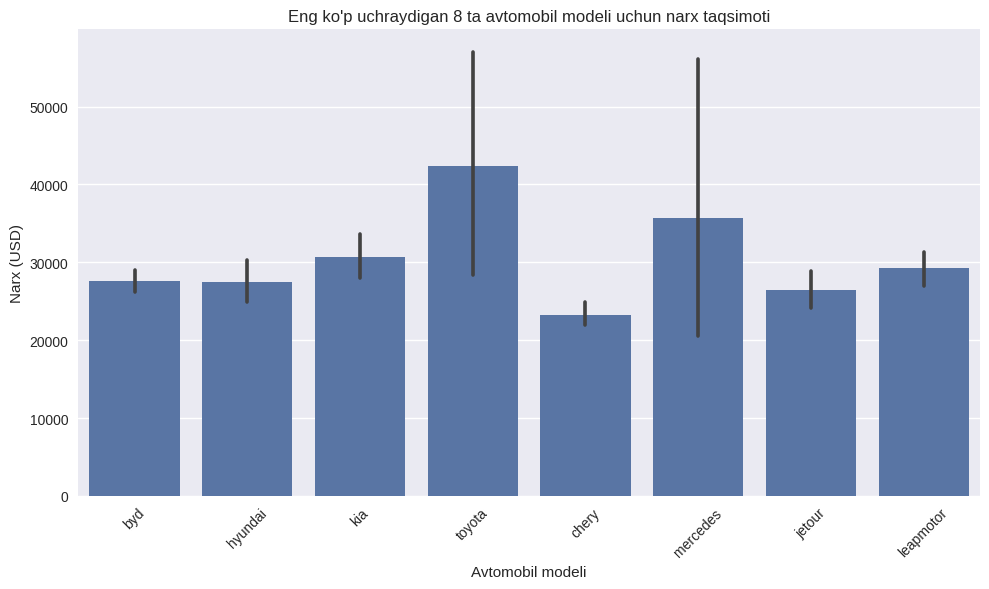

In [ ]:
plt.figure(figsize=(10, 6))
top_8_models = df['Moshina modeli'].value_counts().nlargest(8).index
df_top_8 = df[df['Moshina modeli'].isin(top_8_models)]
sns.barplot(data=df_top_8, x='Moshina modeli', y='Narxi', order=top_8_models)

plt.title("Eng ko'p uchraydigan 8 ta avtomobil modeli uchun narx taqsimoti")
plt.xlabel("Avtomobil modeli")
plt.ylabel("Narx (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

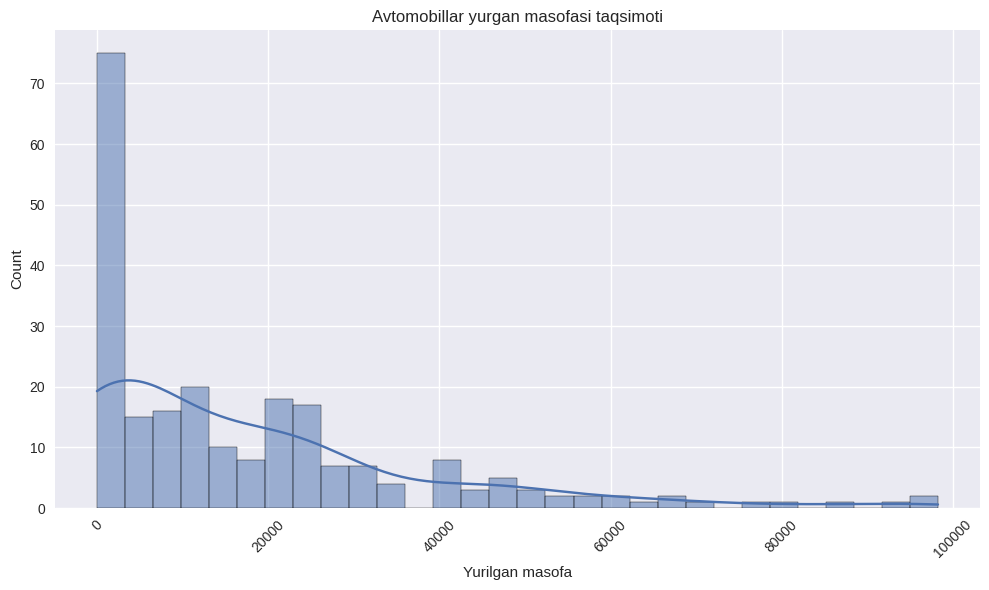

In [ ]:
df['Probeg'] = pd.to_numeric(df['Probeg'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Probeg'].notna() & (df['Probeg'] < 100000)], x='Probeg', bins=30, kde=True)

plt.title("Avtomobillar yurgan masofasi taqsimoti")
plt.xlabel("Yurilgan masofa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

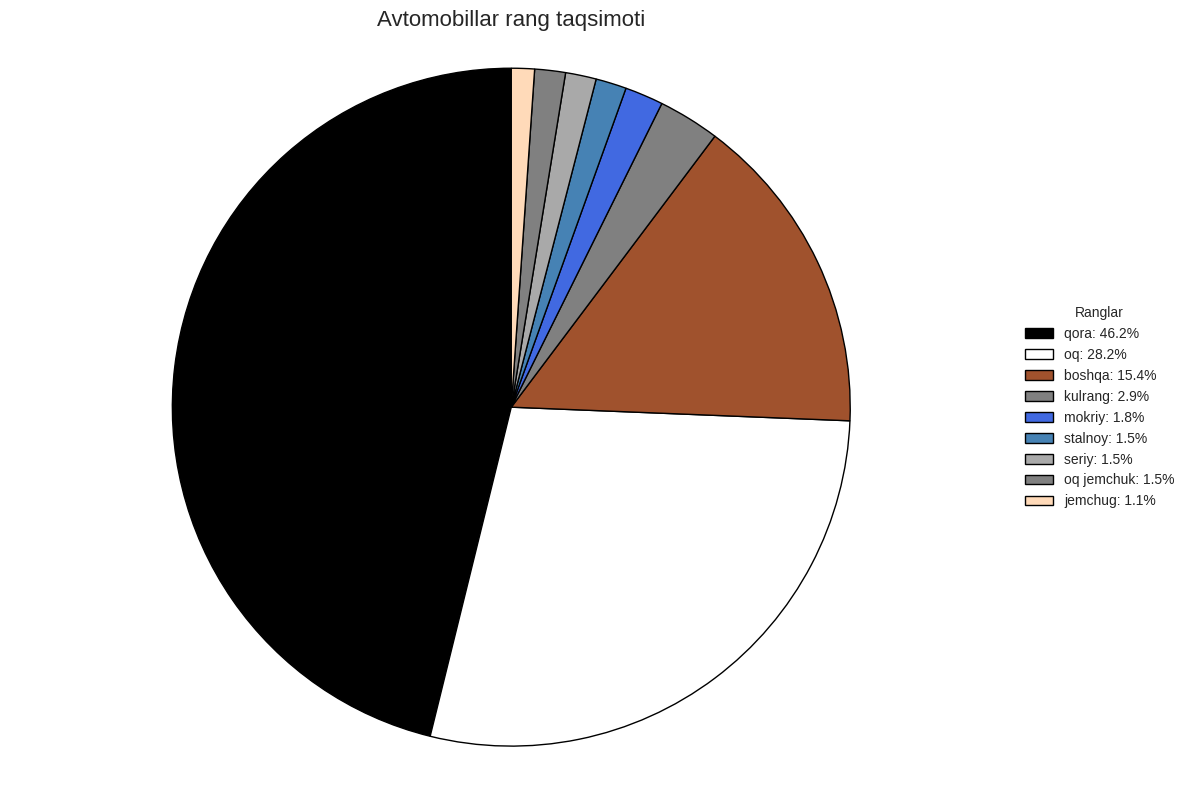

In [ ]:
import matplotlib.pyplot as plt


color_mapping = {
    'oq': 'white',
    'qora': 'black',
    'kulrang': 'gray',
    'boshqa': '#A0522D',
    'jemchug': '#FFDAB9',
    'stalnoy': '#4682B4',
    'mokriy': '#4169E1',
    'seriy': 'darkgray',
    'oq jemchug': '#FFF5EE'
}


color_counts = df['Rangi'].value_counts()

colors = [color_mapping.get(color, '#808080') for color in color_counts.index]

plt.figure(figsize=(12, 8))
plt.pie(
    color_counts.values,
    colors=colors,
    startangle=90,
    labeldistance=1.1,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title("Avtomobillar rang taqsimoti", fontsize=16)
plt.axis('equal')


percentages = [f'{count / sum(color_counts.values) * 100:.1f}%' for count in color_counts.values]

labels_with_percentages = [f'{label}: {percentage}' for label, percentage in zip(color_counts.index, percentages)]
plt.legend(labels_with_percentages, title="Ranglar", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()